# Import

In [1]:
#First we import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set ()
import scipy
import scipy.stats
import statistics

In [2]:
#we load the data set
df = pd.read_csv("new-seismic-bumps.csv")

In [3]:
#We show the dataset
df

,magnitude,time
0,2000,1
1,3000,3
2,1000,6
3,4000,7
4,500,9
...,...,...
1115,90000,2554
1116,600,2555
1117,6000,2567
1118,1000,2569


In [4]:
#select threshold for min magnitude to be counted as event
m = 10000
df = df.loc[df['magnitude'] >= m]

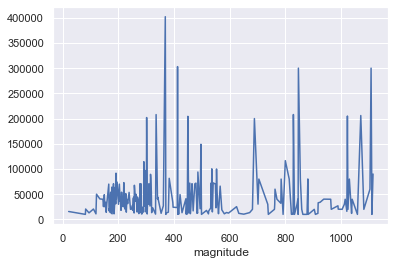

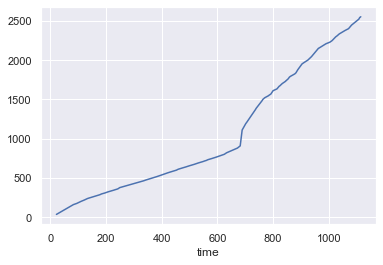

In [5]:
#we make a plot for every columns to visualize the data and see possible correlations
for column in df.head():
    plt.plot(df[column])
    plt.xlabel(column)
    plt.show()

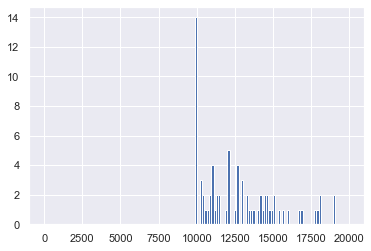

In [6]:
h=plt.hist(df["magnitude"], bins=np.arange(0,20000,150))
plt.show()

In [7]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [8]:
print(skew(df["magnitude"]))
print(kurtosis(df["magnitude"]))

3.4439438719943594
14.3501230067065


In [9]:
energy=df["magnitude"]-statistics.mean(df["magnitude"])

In [10]:
statistics.mean(df["magnitude"])

45045.17543859649

In [11]:
print(max(energy))

356954.8245614035


In [12]:
print(min(energy))

-35045.17543859649


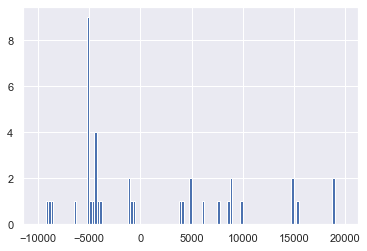

In [13]:
plt.hist(energy, bins=np.arange(-10000,20000,250))
plt.show()

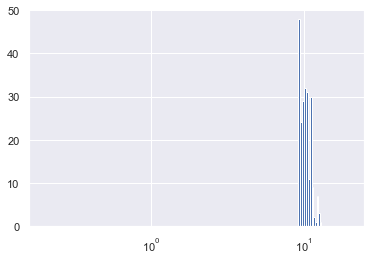

In [14]:
plt.hist(np.log(df["magnitude"]), bins=np.arange(-1,20,0.3))
plt.xscale("log")
plt.show()

In [15]:
dfa = df.to_numpy()

In [16]:
#select how long you want the data input from 0 to dfa[:, 0] (don't run this cell)
dfa = dfa[:100]

In [17]:
dfa[:, 0]

array([ 15700,  10000,  20600,  13000,  20600,  11000,  50000,  40600,
        40000,  25400,  49000,  25000,  34000,  14000,  31500,  70000,
        18000,  21300,  14600,  19000,  44000,  54000,  12700,  36500,
        32700,  64000,  11000,  70800,  32800,  11000,  30000,  63800,
        30900,  91700,  40000,  74000,  30000,  70000,  35900,  40700,
        18000,  54000,  31000,  25000,  73000,  27100,  20600,  20700,
        51200,  14400,  40000,  34400,  31300,  40000,  53600,  20000,
        21000,  27600,  17900,  41200,  44200,  12700,  67700,  36200,
        49800,  14600,  44400,  38600,  11500,  34400,  22000,  14300,
        70700,  15000,  70500,  15400,  10800,  20500,  11500,  25100,
        14700, 114400,  40600,  71300,  27500,  25700,  97100,  15000,
        14200, 202000,  10800,  30200,  30000,  70600,  26600,  89400,
        81400,  52700,  13400,  20800], dtype=int64)

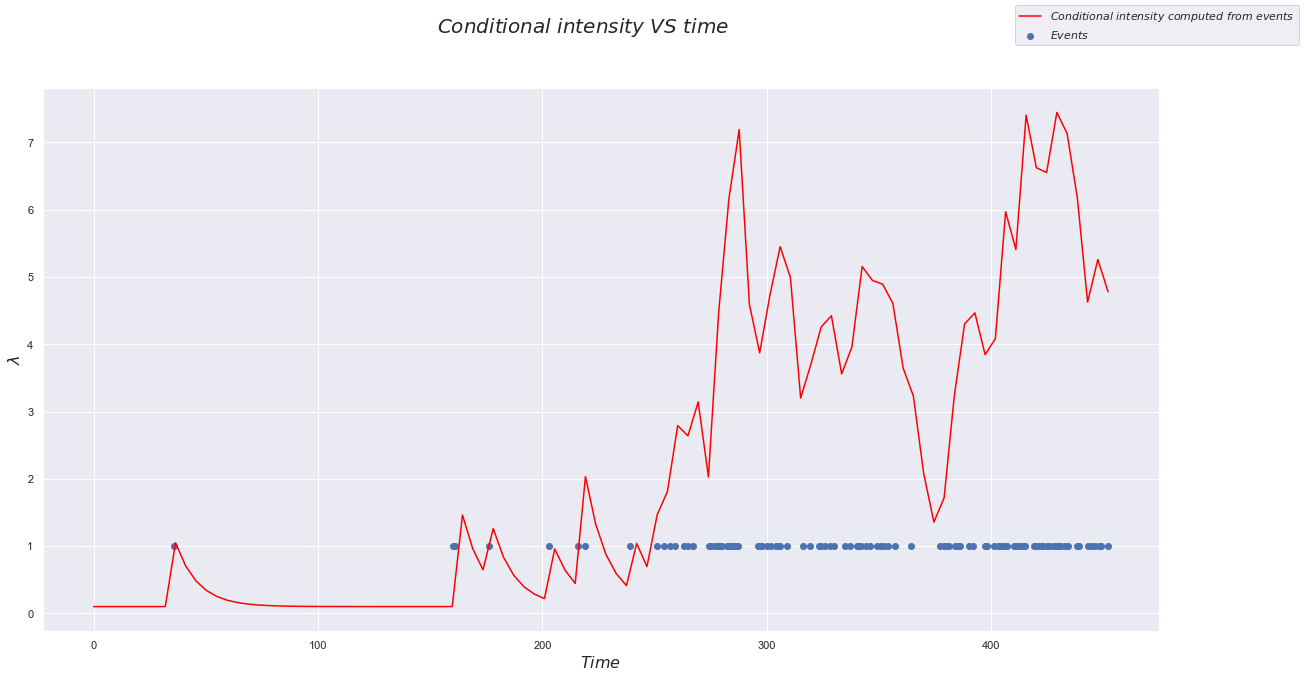

In [18]:
import math, matplotlib
import matplotlib.lines

mu = 0.1 # Parameter values as found in the article http://jheusser.github.io/2013/09/08/hawkes.html Hawkes Process section.
alpha = 1.0
beta = 0.1

EventTimes = dfa[:, 1]

" Compute conditional intensities for all times using the Hawkes process. "
timesOfInterest = np.linspace(0.0, dfa[-1,1], 100) # Times where the intensity will be sampled.
conditionalIntensities = [] # Conditional intensity for every epoch of interest.
for t in timesOfInterest:
     conditionalIntensities.append( mu + np.array( [alpha*math.exp(-beta*(t-ti)) if t > ti else 0.0 for ti in EventTimes] ).sum() ) # Find the contributions of all preceding events to the overall chance of another one occurring. All events that occur after t have no contribution.

" Plot the conditional intensity time history. "
fig = plt.figure(figsize=(20,10))
ax = fig.gca()

labelsFontSize = 16
ticksFontSize = 14

fig.suptitle(r"$Conditional\ intensity\ VS\ time$", fontsize=20)
ax.grid(True)
ax.set_xlabel(r'$Time$',fontsize=labelsFontSize)
ax.set_ylabel(r'$\lambda$',fontsize=labelsFontSize)
matplotlib.rc('xtick', labelsize=ticksFontSize) 
matplotlib.rc('ytick', labelsize=ticksFontSize)

eventsScatter = ax.scatter(EventTimes,np.ones(len(EventTimes))) # Just to indicate where the events took place.

ax.plot(timesOfInterest, conditionalIntensities, color='red', linestyle='solid', marker=None, markerfacecolor='blue', markersize=12)
fittedPlot = matplotlib.lines.Line2D([],[],color='red', linestyle='solid', marker=None,  markerfacecolor='blue', markersize=12)

fig.legend([fittedPlot, eventsScatter], [r'$Conditional\ intensity\ computed\ from\    events$', r'$Events$'])
plt.show()

In [19]:
def fit_hawkes(data):
  # initial guess where a is alpha and C is beta
  pstart = c(mu = 0.5, C = 1, a = 0.1)

  # create a ptproc object using the conditional intensity function as defined by ptproc
  ppm = ptproc(pts = data, cond.int = hawkes.cond.int, params = pstart)

  # assumption that the intensity has to be positive
  condition(ppm) = penalty(code = NULL, condition = quote(any(params < 0)))

  # fit using standard optim
  f = ptproc.fit(ppm, optim.control = list(trace = 2), alpha = 1e+5, hessian = TRUE)

  return (f);

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-19-83ac2a0d6a54>, line 6)

In [ ]:
import scipy.optimize
import matplotlib.lines

" Read example trades' data. "
all_trades = df # All trades' data.
all_counts = pd.DataFrame({'counts': np.ones(len(all_trades))}, index=all_trades.index) # Only the count of the trades is really important.
empirical_1min = all_counts.resample('1min', how='sum') # Bin the data so find the number of trades in 1 minute intervals.

baseEventTimes = np.array( range(len(empirical_1min.values)), dtype=np.float64) # Dummy times when the events take place, don't care too much about actual epochs where the bins are placed - this could be scaled to days since epoch, second since epoch and any other measure of time.
eventTimes = [] # With the event batches split into separate events.
for i in range(len(empirical_1min.values)): # Deal with many events occurring at the same time - need to distinguish between them by splitting each batch of events into distinct events taking place at almost the same time.
    if not np.isnan(empirical_1min.values[i]):
        for j in range(empirical_1min.values[i]):
            eventTimes.append(baseEventTimes[i]+0.000001*(j+1)) # For every event that occurrs at this epoch enter a dummy event very close to it in time that will increase the conditional intensity.

eventTimes = np.array( eventTimes, dtype=np.float64 ) # Change to array for ease of operations.

" Find a fit for alpha, beta, and mu that minimises loglikelihood for the input data. "
#res = scipy.optimize.minimize(loglikelihood, (0.01, 0.1,0.1), method='Nelder-Mead', args = (eventTimes,))
#(mu, alpha, beta) =  res.x
mu = 0.07 # Parameter values as found in the article.
alpha = 1.18
beta = 1.79

" Compute conditional intensities for all epochs using the Hawkes process - add more points to see how the effect of individual events decays over time. "
conditionalIntensitiesPlotting = [] # Conditional intensity for every epoch of interest.
timesOfInterest = np.linspace(eventTimes.min(), eventTimes.max(), eventTimes.size*10) # Times where the intensity will be sampled. Sample at much higher frequency than the events occur at.
for t in timesOfInterest:
    conditionalIntensitiesPlotting.append( mu + np.array( [alpha*math.exp(-beta*(t-ti))   if t > ti else 0.0 for ti in eventTimes] ).sum() ) # Find the contributions of all preceding events to the overall chance of another one occurring. All events that occur after time of interest t have no contribution.

" Compute conditional intensities at the same epochs as the empirical data are known. "
conditionalIntensities=[] # This will be used in the QQ plot later, has to have the same size as the empirical data.
for t in np.linspace(eventTimes.min(), eventTimes.max(), eventTimes.size):
    conditionalIntensities.append( mu + np.array( [alpha*math.exp(-beta*(t-ti)) if t > ti else 0.0 for ti in eventTimes] ).sum() ) # Use eventTimes here as well to feel the influence of all the events that happen at the same time.

" Plot the empirical and fitted datasets. "
fig = plt.figure()
ax = fig.gca()

labelsFontSize = 16
ticksFontSize = 14

fig.suptitle(r"$Conditional\ intensity\ VS\ time$", fontsize=20)
ax.grid(True)
ax.set_xlabel(r'$Time$',fontsize=labelsFontSize)
ax.set_ylabel(r'$\lambda$',fontsize=labelsFontSize)
matplotlib.rc('xtick', labelsize=ticksFontSize) 
matplotlib.rc('ytick', labelsize=ticksFontSize)

# Plot the empirical binned data.
ax.plot(baseEventTimes,empirical_1min.values, color='blue', linestyle='solid',   marker=None, markerfacecolor='blue', markersize=12)
empiricalPlot = matplotlib.lines.Line2D([],[],color='blue', linestyle='solid', marker=None, markerfacecolor='blue', markersize=12)

# And the fit obtained using the Hawkes function.
ax.plot(timesOfInterest, conditionalIntensitiesPlotting, color='red', linestyle='solid',   marker=None, markerfacecolor='blue', markersize=12)
fittedPlot = matplotlib.lines.Line2D([],[],color='red', linestyle='solid', marker=None, markerfacecolor='blue', markersize=12)

fig.legend([fittedPlot, empiricalPlot], [r'$Fitted\ data$', r'$Empirical\ data$'])
plt.show()

In [21]:
EventTimes = dfa[:, 1]
loglikelihood = mu + alpha*math.exp(-beta)
res = scipy.optimize.minimize(loglikelihood, (0.01, 0.1,0.1), method='Nelder-Mead', args = (EventTimes,))
(mu, alpha, beta) =  res.x

TypeError: 'float' object is not callable